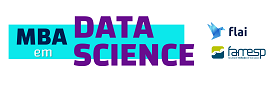

# **Taxa de Desocupação no Brasil**

## **Entendendo o contexto**

### **Desocupação no Brasil**

Vivemos no Brasil em um sistema capitalista onde que tem base na propriedade privada dos meios de produção e sua operação com fins lucrativos. Também deve ser elencado em nosso sistema econômico a acumulação de capital, troca voluntária, sistema de preço e também o trabalho assalariado.

Para entender o Mercado de Trabalho Brasileiro, o Instituto Brasileiro de Geografia e Estatística - IBGE, conduz a Pesquisa Nacional por Amostra de Domicílios Contínua, uma pesquisa que desde 2012 uniu a Pesquisa Mensal de Emprego e a Pesquisa Nacional por Amostra de Domicílio, e dentre diversas caracterísitca da população, mensura a taxa de desocupação.

De acordo com o IBGE: "O desemprego, de forma simplificada, se refere às pessoas com idade para trabalhar (acima de 14 anos) que não estão trabalhando, mas estão disponíveis e tentam encontrar trabalho. Assim, para alguém ser considerado desempregado, não basta não possuir um emprego."

Por exemplo, considere uma Jovem que Possui uma Delicatessen e:

- Seu filho Universitário que emprega todo seu tempo aos estudos da sua graduação;

- Sua mãe, que é Dona de Casa e que não realiza trabalho fora de casa;

- Seu esposo, que recentemente perdeu o emprego e busca a recolocação no Mercado de Trabalho;

- Um confeteiro que prepara as delícias da Delicatessen da Jovem.

Para o IBGE, na PNAD Contínua, O Universitário e a Senhora Dona de Casa serão considerados como fora da força do trabalho, a Jovem Empreendedora e o Confeiteiro seria considerada uma pessoa Ocupada, e o Esposo da Jovem que busca a recolocação seria uma pessoa Desocupada.

para entender melhor o Mercado de Trabalho pela ótica do IBGE, veja esta imagem abaixo:



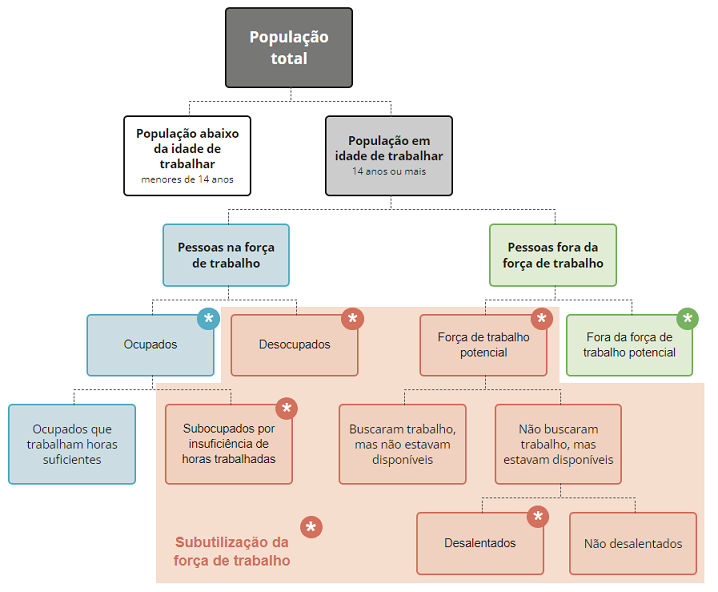

### **O Objetivo da Aula**

Apresentar uma visualização que demonstre a diferença da taxa de desocupação entre as Unidades da Federação do Brasil. 

### **O dataset**

O sistema IBGE de Recuperação Automática - SIDRA, é um aplicativo web excelente para obter dados e registros administrativos organizado pelo IBGE, como alguns indicadores oriundos da PNADC trimestral, como a taxa de desocupação, que pode ser acessado https://sidra.ibge.gov.br/pesquisa/pnadct/tabelas.

Nesses conjuntos de dados cada instância é um registro de uma taxa de desocupação em determinada unidade da federação do Brasil em determinado trimestre de um dado ano, e possui 3 atributos:

- **TRIMESTRE:** Uma string que determina ano e trimestre da instância;
- **NM_UF:** Qual Unidade da Federação do Brasil pertence a instância;
- **TX_DESOCUPACAO:** Taxa de desocupação, em porcetagem, do trimestre em determinada região do Brasil;

Este conjunto já organizado em formato csv encontra-se disponível em:
- https://raw.githubusercontent.com/jonates/opendata/master/pnad_continua/pnadct_UF.csv



### **O arquivo com dados geoespaciais**

Para realizar o Cartograma é preciso do arquivo georreferenciado que vai delimitar as unidades da federação do Brasil.

Este arquivo em formato json encontra-se disponível em:
- https://raw.githubusercontent.com/jonates/opendata/master/arquivos_geoespaciais/unidades_da_federacao.json


### **A Biblioteca Plotly**

Plotly é uma biblioteca que fornece diversos gráficos dinâmicos e interativos.

Para maiores informações do Plotly, consulte a documentação no endereço a seguir:

- https://plotly.com/

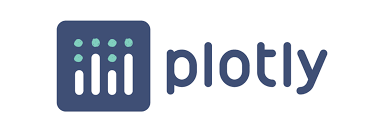

## **Hands-on**

1. **Preparar o ambiente**;
2. **Carregar dados**;
3. **Entender a estrutura dos dados**;
4. **Transformar dados**;
5. **Elaboração do Cartograma**.

## **Mapa por Unidades da Federação do Brasil**

### **Carregando o conjunto de dados**

In [26]:
# Importando o Pandas
import pandas as pd

In [74]:
# Importando o conjunto de dados da PNAD Contínua
pnadct_UF = pd.read_csv(
    filepath_or_buffer = 'https://raw.githubusercontent.com/jonates/opendata/master/pnad_continua/pnadct_UF.csv', 
    sep=';',
    decimal=','
)

# Espiando o conjunto de dados
pnadct_UF.head()

,TRIMESTRE,NM_UF,TX_DESOCUPACAO
0,20121,Rondônia,8.1
1,20121,Acre,9.2
2,20121,Amazonas,11.1
3,20121,Roraima,8.5
4,20121,Pará,8.0


### **Espiando a estrutura dos dados**

In [65]:
# Informacoes gerais do conjunto de dados
pnadct_UF.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TRIMESTRE       1080 non-null   int64  
 1   NM_UF           1080 non-null   object 
 2   TX_DESOCUPACAO  1080 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 25.4+ KB


### **Transformação do conjunto de dados**

In [66]:
# Filtrando somente o ultimo trimestre de 2021
pnadct_UF_20214 = pnadct_UF.query('TRIMESTRE==20214')

# Espiando o conjunto de dados filtrado
pnadct_UF_20214

,TRIMESTRE,NM_UF,TX_DESOCUPACAO
1053,20214,Rondônia,6.8
1054,20214,Acre,13.2
1055,20214,Amazonas,13.1
1056,20214,Roraima,9.2
1057,20214,Pará,11.0
1058,20214,Amapá,17.5
1059,20214,Tocantins,9.6
1060,20214,Maranhão,13.4
1061,20214,Piauí,11.9
1062,20214,Ceará,11.1


### **Carregando o arquivo com dados geoespaciais das regiões do Brasil**

In [67]:
# Fazendo download do conjunto de dados
!wget --verbose --show-progress --no-check-certificate https://raw.githubusercontent.com/jonates/opendata/master/arquivos_geoespaciais/unidades_da_federacao.json

--2022-06-28 00:08:27--  https://raw.githubusercontent.com/jonates/opendata/master/arquivos_geoespaciais/unidades_da_federacao.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123654 (121K) [text/plain]
Saving to: ‘unidades_da_federacao.json.1’

unidades_da_federac 100%[===================>] 120.76K  --.-KB/s    in 0.02s   

2022-06-28 00:08:27 (5.40 MB/s) - ‘unidades_da_federacao.json.1’ saved [123654/123654]



In [31]:
# Importando biblioteca necessária
import json

In [34]:
# Abrindo o JSON e guardando em um objeto
objeto_geo_uf = open('/content/unidades_da_federacao.json',)

In [35]:
# Lendo o arquivo georreferenciado no formato JSON
geo_uf = json.load(objeto_geo_uf) 

In [81]:
# Espiando a estrutura do json
geo_uf['features'][6]

{'geometry': {'coordinates': [[[-48.20054439299997, -15.500255152999962],
    [-47.41733820999994, -15.500256607999994],
    [-47.322160931999974, -15.598471616999952],
    [-47.3125601629999, -15.73990848599994],
    [-47.378837711999935, -15.884151574999947],
    [-47.308386986999935, -16.050264260999967],
    [-48.27860601199998, -16.05026116599989],
    [-48.28565984899991, -15.84452858099997],
    [-48.21747172599998, -15.762279238999941],
    [-48.20054439299997, -15.500255152999962]]],
  'type': 'Polygon'},
 'properties': {'CD_GEOCUF': '53',
  'NM_ESTADO': 'DISTRITO FEDERAL',
  'NM_REGIAO': 'CENTRO-OESTE'},
 'type': 'Feature'}

### **Mapa com taxa de desocupação por 'Unidades da Federação' do Brasil no 4º trimestre de 2021**

In [82]:
# Importando as bibliotecas necessarias
import plotly.express as px

In [68]:
# Criando o atributo NM_ESTADO com os nomes dos estados em letras maiúsculas igual ao do arquivo geoespacial
pnadct_UF_20214['NM_ESTADO'] = pnadct_UF_20214['NM_UF'].str.upper()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
# Verificando a estrutura do conjunto de dados após renomear
pnadct_UF_20214.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 1053 to 1079
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TRIMESTRE       27 non-null     int64  
 1   NM_UF           27 non-null     object 
 2   TX_DESOCUPACAO  27 non-null     float64
 3   NM_ESTADO       27 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ KB


In [83]:
# Espiando o conjunto de dados
pnadct_UF_20214

,TRIMESTRE,NM_UF,TX_DESOCUPACAO,NM_ESTADO
1053,20214,Rondônia,6.8,RONDÔNIA
1054,20214,Acre,13.2,ACRE
1055,20214,Amazonas,13.1,AMAZONAS
1056,20214,Roraima,9.2,RORAIMA
1057,20214,Pará,11.0,PARÁ
1058,20214,Amapá,17.5,AMAPÁ
1059,20214,Tocantins,9.6,TOCANTINS
1060,20214,Maranhão,13.4,MARANHÃO
1061,20214,Piauí,11.9,PIAUÍ
1062,20214,Ceará,11.1,CEARÁ


In [84]:
# Criando o mapa
mapa_desemprego_uf = px.choropleth_mapbox(
    data_frame = pnadct_UF_20214, 
    geojson = geo_uf, 
    locations='NM_ESTADO', 
    featureidkey='properties.NM_ESTADO',
    color='TX_DESOCUPACAO',
    color_continuous_scale= 'blues',
    range_color=(5, 15),
    mapbox_style="open-street-map",
    zoom=2.5, 
    center = {"lat": -17.14, "lon": -57.33},
    opacity=1,
    labels={'TX_DESOCUPACAO':'Taxa de desocupação (em %)', 
            'NM_ESTADO' : 'Unidade da Federação do Brasil'
    },
    width = 800,
    height = 600
)

In [85]:
# Ajustando as margens
mapa_desemprego_uf.update_layout(margin={'r':0,'t':0,'l':0, 'b':0})

# Exibindo o mapa
mapa_desemprego_uf.show()

Para mais detalhes destes gráficos consulte a documentação oficial do Plotly através dos links:
- https://plotly.com/python/mapbox-county-choropleth/
- https://plotly.com/python-api-reference/generated/plotly.express.choropleth_mapbox.html
- https://plotly.com/python/colorscales/
- https://plotly.com/python/styling-plotly-express/
